In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

In [18]:
accuracy = np.zeros((1,6))

In [19]:
for i in range(6):
  from keras.datasets import cifar10
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  
  inp_layer = Input(shape = (32, 32, 3))
  conv1 = Conv2D(filters = 8*2^i, kernel_size=(5, 5), strides = (1, 1), padding = 'same',activation = 'relu')(inp_layer)
  maxp1 = MaxPooling2D(pool_size=(2, 2), strides = (2, 2))(conv1)
  flat = tf.keras.layers.GlobalAveragePooling2D()(maxp1)
  output = Dense(units = 10, activation = 'softmax')(flat)

  Model1 = Model(inputs = inp_layer, outputs = output)
  opt = Adam(learning_rate=0.001)
  loss = categorical_crossentropy
  Model1.compile(optimizer=opt, loss = loss, metrics = 'acc')
  opt = Adam(learning_rate=0.001)
  loss = categorical_crossentropy
  
  Model1.compile(optimizer=opt, loss = loss, metrics = 'acc')
  
  y_train = to_categorical(y_train, num_classes = 10)
  y_test = to_categorical(y_test, num_classes = 10)
  x_train = x_train.reshape((50000, 32, 32, 3))
  x_test = x_test.reshape((10000, 32, 32, 3))
  
  results_1 = Model1.fit(x_train, y_train,
                    batch_size=32,
                    epochs = 10,
                    validation_data=(x_test, y_test))
  accuracy[0][i] = results_1.history['val_acc'][-1]
print(accuracy)

Epoch 1/10
1563/1563 [==============================] - 39s 25ms/step - loss: 3.0758 - acc: 0.1903 - val_loss: 2.0084 - val_acc: 0.2397
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.9217 - acc: 0.2893 - val_loss: 1.8659 - val_acc: 0.3154
Epoch 3/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.8260 - acc: 0.3252 - val_loss: 1.8412 - val_acc: 0.3034
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.7596 - acc: 0.3549 - val_loss: 1.7156 - val_acc: 0.3810
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.7033 - acc: 0.3830 - val_loss: 1.6656 - val_acc: 0.3979
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.6719 - acc: 0.3937 - val_loss: 1.6302 - val_acc: 0.4089
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.6388 - acc: 0.4066 - val_loss: 1.6206 - val_acc: 0.4166
Epoch 8/10
1563/1563 [==========================

In [20]:
print(accuracy)

[[0.4382     0.45140001 0.43830001 0.41890001 0.43399999 0.43020001]]


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

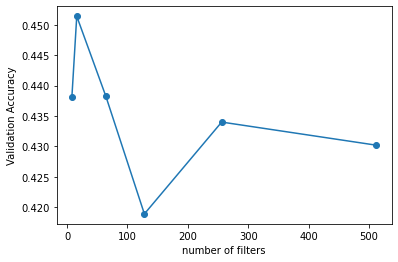

In [45]:
x = [8, 16, 64, 128, 256, 512]
y = [0.4382 ,    0.45140001, 0.43830001, 0.41890001, 0.43399999, 0.43020001]
# y = np.array(accuracy)
plt.plot(x,y, linestyle='-', marker='o')
plt.xlabel('number of filters')
plt.ylabel('Validation Accuracy')
plt.show()